**Import Necessary Modules**

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from phringe.core.entities.configuration import Configuration
from phringe.main import PHRINGE

**Calculate the Differential Counts**

_PHRINGE_ is optimized to run on GPUs, but can also be run on CPUs. Setting `gpu_index=None` will result in CPU usage only, while specifying e.g. `gpu_index=0` will use the zeroth available GPU. For reproducibility, `seed` can be set to a specific value, resulting in identical results for each run. Note that `seed=None` results in the use of a random seed each run. The `grid_size` parameter specifies the number of grid points in the spatial domain. The larger the grid size, the more accurate the results, but the longer the computation time. The config file used in this example can be found [here](create_config_file.rst).

In [2]:
# Create PHRINGE object
phringe = PHRINGE(gpu_index=1, seed=1, grid_size=40)

# Create and set a configuration object
config_file_path = Path('../_static/config.py')

config = Configuration(path=config_file_path)
phringe.set(config)

# Calculate the counts and differential counts
counts = phringe.get_counts()
diff_counts = counts[2] - counts[3]  # Alternatively: phringe.get_diff_counts()

100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


**Plot the Differential Counts**

Then we can plot the differential counts:

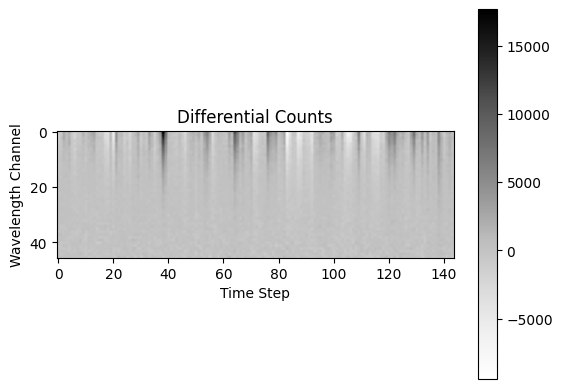

In [3]:
plt.imshow(diff_counts.cpu().numpy(), cmap='Greys')
plt.title('Differential Counts')
plt.ylabel('Wavelength Channel')
plt.xlabel('Time Step')
plt.colorbar()
plt.show()